In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Replace 'path_to_your_file.csv' with the actual path to your CSV file
file_path = 'Downloads/MushroomDataset 2/secondary_data.csv'
df = pd.read_csv(file_path,delimiter=';')

# Display the first few rows of the dataset
df.head()


class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season  
0               NaN       d      w  
1               NaN       d      u  
2               NaN       d      w  
3               NaN       d      w  
4               NaN       d      w  

[5 rows x 21 columns]

In [3]:
# Get basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [4]:
# Columns to drop
columns_to_drop = [
    'cap-surface', 'gill-spacing', 
    'stem-root', 'stem-surface', 'veil-type', 
    'veil-color', 'spore-print-color'
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataset
df_cleaned.head()

# Get basic information about the cleaned dataset
df_cleaned.info()

# Check for remaining missing values
df_cleaned.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-color            61069 non-null  object 
 7   stem-height           61069 non-null  float64
 8   stem-width            61069 non-null  float64
 9   stem-color            61069 non-null  object 
 10  has-ring              61069 non-null  object 
 11  ring-type             58598 non-null  object 
 12  habitat               61069 non-null  object 
 13  season                61069 non-null  object 
dtypes: float64(3), object(11)
memory usage: 6.5+ MB


class                      0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         9884
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               2471
habitat                    0
season                     0
dtype: int64

In [5]:
# Drop rows where 'gill-attachment' has missing values
df_cleaned = df_cleaned.dropna(subset=['gill-attachment', 'ring-type'])

# Display the first few rows of the cleaned dataset
df_cleaned.head()

# Get basic information about the cleaned dataset
df_cleaned.info()

# Check for remaining missing values
df_cleaned.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 49067 entries, 0 to 61068
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 49067 non-null  object 
 1   cap-diameter          49067 non-null  float64
 2   cap-shape             49067 non-null  object 
 3   cap-color             49067 non-null  object 
 4   does-bruise-or-bleed  49067 non-null  object 
 5   gill-attachment       49067 non-null  object 
 6   gill-color            49067 non-null  object 
 7   stem-height           49067 non-null  float64
 8   stem-width            49067 non-null  float64
 9   stem-color            49067 non-null  object 
 10  has-ring              49067 non-null  object 
 11  ring-type             49067 non-null  object 
 12  habitat               49067 non-null  object 
 13  season                49067 non-null  object 
dtypes: float64(3), object(11)
memory usage: 5.6+ MB


class                   0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

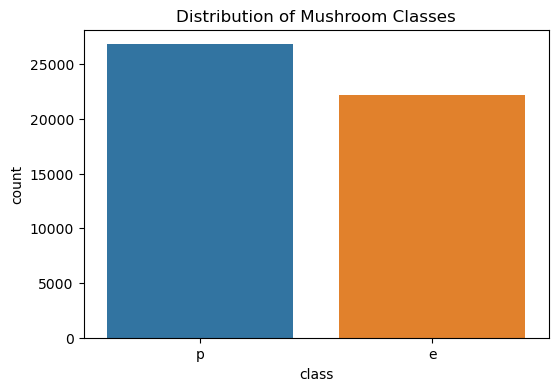

In [6]:

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='class')
plt.title('Distribution of Mushroom Classes')
plt.show()

class
p    22239
e    22239
Name: count, dtype: int64
  class  cap-diameter cap-shape cap-color does-bruise-or-bleed  \
0     p          3.62         x         r                    f   
1     e         10.42         x         n                    t   
2     p          9.06         x         u                    t   
3     p          7.04         x         n                    f   
4     e         13.79         f         g                    f   

  gill-attachment gill-color  stem-height  stem-width stem-color has-ring  \
0               s          u         6.73        8.14          n        t   
1               e          p         9.38       17.59          w        t   
2               x          u         8.10       18.63          u        f   
3               s          g         5.37        6.42          n        f   
4               d          w         7.29       23.50          w        f   

  ring-type habitat season  
0         e       g      a  
1         p       d      a  

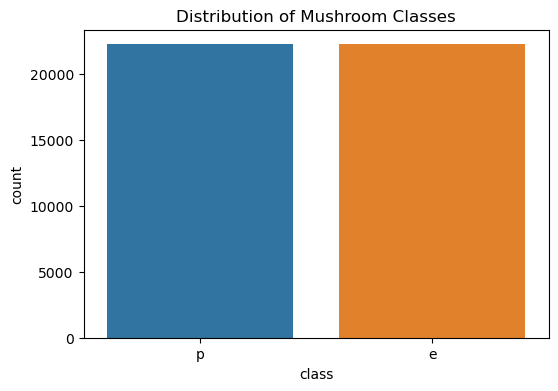

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_cleaned is your cleaned dataframe

# Separate the dataset into two subsets based on the class
poisonous = df_cleaned[df_cleaned['class'] == 'p']
edible = df_cleaned[df_cleaned['class'] == 'e']

# Determine the size of the smaller class
min_size = min(len(poisonous), len(edible))

# Downsample the larger class to match the size of the smaller class
poisonous_downsampled = poisonous.sample(min_size, random_state=42)
edible_downsampled = edible.sample(min_size, random_state=42)

# Concatenate the balanced subsets
balanced_df = pd.concat([poisonous_downsampled, edible_downsampled])

# Shuffle the resulting balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the class distribution to verify the 50-50 split
print(balanced_df['class'].value_counts())

# Display the first few rows of the balanced dataset
print(balanced_df.head())

# Display information about the balanced dataset to verify it has all columns
print(balanced_df.info())
plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_df, x='class')
plt.title('Distribution of Mushroom Classes')
plt.show()

In [8]:
# Assuming balanced_df is your balanced dataset
dataset = balanced_df

# Split the data into features and target
X = dataset.drop(['class'], axis=1)
y = dataset['class']

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X)
X.head()

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)
y = label_encoder.fit_transform(y)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
continuous_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Apply the scaler to the continuous columns
X[continuous_columns] = scaler.fit_transform(X[continuous_columns])

# Display the scaled features
X[continuous_columns].head()


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.head())


(35582, 77) (8896, 77) (35582,) (8896,)
       cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  \
36053      0.007916     0.109515    0.014628            0            0   
13905      0.099838     0.202513    0.156289            0            0   
32240      0.063651     0.185278    0.060341            0            0   
36163      0.113570     0.491562    0.077471            0            0   
12141      0.060420     0.164452    0.034357            1            0   

       cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  ...  \
36053            0            0            0            0            1  ...   
13905            1            0            0            0            0  ...   
32240            0            0            0            0            1  ...   
36163            1            0            0            0            0  ...   
12141            0            0            0            0            0  ...   

       habitat_h  habitat_l  habitat_m  

In [22]:
class TreeNode:
    def __init__(self, data=None, feature_idx=None, feature_val=None, prediction_probs=None, impurity=None, is_leaf=False):
        self.data = data
        self.feature_idx = feature_idx
        self.feature_val = feature_val
        self.prediction_probs = prediction_probs
        self.impurity = impurity
        self.is_leaf = is_leaf
        self.left = None
        self.right = None

    def decision_criterion(self, data_point):
        if self.is_leaf:
            return None
        return data_point[self.feature_idx] < self.feature_val

    def node_def(self):
        return f'Feature Index: {self.feature_idx}, Feature Value: {self.feature_val}, Impurity: {self.impurity}, Prediction Probs: {self.prediction_probs}, Is Leaf: {self.is_leaf}'


In [57]:

class DecisionTree(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=4, min_samples_leaf=1, min_information_gain=0.0, criterion='entropy'):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain
        self.criterion = criterion
        self.feature_importances_ = None

    def entropy(self, class_probabilities):
        return sum([-p * np.log2(p) for p in class_probabilities if p > 0])

    def gini_index(self, class_probabilities):
        return 1 - sum([p ** 2 for p in class_probabilities])

    def variance_reduction(self, subsets):
        total_count = sum([len(subset) for subset in subsets])
        if total_count == 0:
            return 0
        total_variance = np.var(np.concatenate(subsets)) if total_count > 0 else 0
        weighted_variances = sum([np.var(subset) * len(subset) / total_count for subset in subsets if len(subset) > 0])
        return total_variance - weighted_variances

    def class_probabilities(self, labels):
        total_count = len(labels)
        return [label_count / total_count for label_count in Counter(labels).values()]

    def data_impurity(self, labels):
        class_probs = self.class_probabilities(labels)
        if self.criterion == 'entropy':
            return self.entropy(class_probs)
        elif self.criterion == 'gini':
            return self.gini_index(class_probs)
        elif self.criterion == 'variance_reduction':
            return np.var(labels) if len(labels) > 0 else 0
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")

    def partition_impurity(self, subsets):
        total_count = sum([len(subset) for subset in subsets])
        if self.criterion == 'variance_reduction':
            return self.variance_reduction(subsets)
        return sum([self.data_impurity(subset) * (len(subset) / total_count) for subset in subsets])

    def split(self, data, feature_idx, feature_val):
        mask_below_threshold = data[:, feature_idx] < feature_val
        group1 = data[mask_below_threshold]
        group2 = data[~mask_below_threshold]
        return group1, group2

    def find_best_split(self, data):
        min_part_impurity = float('inf')
        min_impurity_feature_idx = None
        min_impurity_feature_val = None

        for idx in range(data.shape[1] - 1):
            feature_val = np.median(data[:, idx])
            g1, g2 = self.split(data, idx, feature_val)
            part_impurity = self.partition_impurity([g1[:, -1], g2[:, -1]])
            if part_impurity < min_part_impurity:
                min_part_impurity = part_impurity
                min_impurity_feature_idx = idx
                min_impurity_feature_val = feature_val
                g1_min, g2_min = g1, g2

        return g1_min, g2_min, min_impurity_feature_idx, min_impurity_feature_val, min_part_impurity

    def find_label_probs(self, data):
        labels_as_integers = data[:, -1].astype(int)
        total_labels = len(labels_as_integers)
        label_probabilities = np.zeros(len(self.labels_in_train), dtype=float)

        for i, label in enumerate(self.labels_in_train):
            label_index = np.where(labels_as_integers == label)[0]
            if len(label_index) > 0:
                label_probabilities[i] = len(label_index) / total_labels

        return label_probabilities

    def create_tree(self, data, current_depth):
        if current_depth >= self.max_depth or len(np.unique(data[:, -1])) == 1:
            is_leaf = True
            label_probabilities = self.find_label_probs(data)
            node_impurity = self.data_impurity(data[:, -1])
            return TreeNode(data, prediction_probs=label_probabilities, impurity=node_impurity, is_leaf=is_leaf)

        split_1_data, split_2_data, split_feature_idx, split_feature_val, split_impurity = self.find_best_split(data)
        label_probabilities = self.find_label_probs(data)
        node_impurity = self.data_impurity(data[:, -1])
        information_gain = node_impurity - split_impurity

        if self.feature_importances_ is None:
            self.feature_importances_ = np.zeros(data.shape[1] - 1)
        self.feature_importances_[split_feature_idx] += information_gain
        print(f"Feature {split_feature_idx} importance updated by {information_gain} (total: {self.feature_importances_[split_feature_idx]})")


        node = TreeNode(data, split_feature_idx, split_feature_val, label_probabilities, split_impurity)

        if self.min_samples_leaf > split_1_data.shape[0] or self.min_samples_leaf > split_2_data.shape[0]:
            node.is_leaf = True
            return node
        elif information_gain < self.min_information_gain:
            node.is_leaf = True
            return node

        current_depth += 1
        node.left = self.create_tree(split_1_data, current_depth)
        node.right = self.create_tree(split_2_data, current_depth)

        return node

    def predict_one_sample(self, X):
        node = self.tree

        while node and not node.is_leaf:
            if node.decision_criterion(X):
                node = node.left
            else:
                node = node.right

        return node.prediction_probs if node else None

    def fit(self, X, y):
        self.labels_in_train = np.unique(y)
        train_data = np.concatenate((X, np.reshape(y, (-1, 1))), axis=1)
        self.tree = self.create_tree(data=train_data, current_depth=0)
        self.feature_importances_ /= np.sum(self.feature_importances_)

        return self

    def predict_proba(self, X):
        pred_probs = np.apply_along_axis(self.predict_one_sample, 1, X)
        return pred_probs

    def predict(self, X):
        pred_probs = self.predict_proba(X)
        preds = np.argmax(pred_probs, axis=1)
        return preds

    def get_params(self, deep=True):
        return {"max_depth": self.max_depth, "min_samples_leaf": self.min_samples_leaf, "min_information_gain": self.min_information_gain, "criterion": self.criterion}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def print_recursive(self, node, level=0):
        if node is not None:
            self.print_recursive(node.left, level + 1)
            print('    ' * 4 * level + '-> ' + node.node_def())
            self.print_recursive(node.right, level + 1)

    def print_tree(self):
        self.print_recursive(node=self.tree)


Feature 5 importance updated by 0.01533402817782633 (total: 3.8687185151916945)
Feature 24 importance updated by 0.0808378159888613 (total: 6.762912402648942)
Feature 20 importance updated by 0.3166890883150208 (total: 6.461734886160404)
Feature 0 importance updated by 1.0 (total: 49.57789815427366)
Feature 42 importance updated by 0.5124816544560277 (total: 7.327414156864084)
Feature 2 importance updated by 0.064218028207083 (total: 17.546793712414857)
Feature 0 importance updated by 0.05534821733561157 (total: 49.633246371609275)
Feature 2 importance updated by 0.11925679380407139 (total: 17.66605050621893)
Feature 0 importance updated by 0.2441395395260446 (total: 49.87738591113532)
Feature 5 importance updated by 0.042776048498108565 (total: 3.911494563689803)
Feature 0 importance updated by 0.31127812445913283 (total: 50.188664035594456)
Feature 29 importance updated by 0.04879494069539847 (total: 6.8593865044110895)
Feature 41 importance updated by 0.22935347186023347 (total: 6.4

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

# Training and evaluating models
dt_entropy = DecisionTree(max_depth=13, min_samples_leaf=4, min_information_gain=0.01, criterion='entropy')
dt_entropy.fit(X_train, y_train)
print("Entropy Criterion:")
evaluate_model(dt_entropy, X_test, y_test)

dt_gini = DecisionTree(max_depth=13, min_samples_leaf=4, min_information_gain=0.01, criterion='gini')
dt_gini.fit(X_train, y_train)
print("\nGini Criterion:")
evaluate_model(dt_gini, X_test, y_test)

Entropy Criterion:
Accuracy: 85.72%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4473
           1       0.98      0.73      0.84      4423

    accuracy                           0.86      8896
   macro avg       0.88      0.86      0.85      8896
weighted avg       0.88      0.86      0.85      8896

Confusion Matrix:
[[4412   61]
 [1209 3214]]

Gini Criterion:
Accuracy: 79.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      4473
           1       0.87      0.69      0.77      4423

    accuracy                           0.79      8896
   macro avg       0.81      0.79      0.79      8896
weighted avg       0.81      0.79      0.79      8896

Confusion Matrix:
[[4003  470]
 [1369 3054]]


Best Parameters: {'min_samples_leaf': 1, 'min_information_gain': 0, 'max_depth': 15, 'criterion': 'entropy'}
Best Cross-validation Accuracy: 98.24%
Test Accuracy: 98.30%
Training Accuracy: 99.54%
Test Accuracy: 98.30%
Cross-Validation Mean Scores:  [0.5007026  0.7461637  0.7886567  0.5007026  0.97557746 0.77581345
 0.5007026  0.5007026  0.5007026  0.8497834  0.81968372 0.73992473
 0.5007026  0.98139504 0.5007026  0.9110226  0.96953514 0.97597099
 0.5007026  0.7461637  0.85430813 0.77584155 0.5007026  0.97240187
 0.97987741 0.5007026  0.78888152 0.78964034 0.5007026  0.5007026
 0.76648335 0.97740433 0.97082797 0.81934647 0.91051661 0.5007026
 0.5007026  0.78902205 0.73989663 0.85495452 0.76634284 0.5007026
 0.5007026  0.74602319 0.98237874 0.73992473 0.5007026  0.76625853
 0.97493107 0.97358216]
Cross-Validation Std Dev:  [4.44327601e-05 2.86115989e-03 1.45833888e-02 4.44327601e-05
 2.74906854e-03 1.09777995e-02 4.44327601e-05 4.44327601e-05
 4.44327601e-05 1.03415766e-02 9.82800962e-03

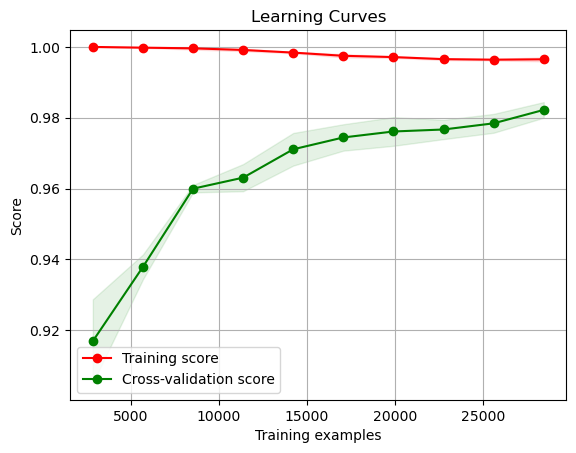

In [12]:
decision_tree = DecisionTree()

# Define the parameter grid
param_grid = {
    'max_depth': [7, 10, 13, 15],
    'min_samples_leaf': [1,2,4,6],
    'min_information_gain': [0, 0.01, 0.1],
    'criterion': ['entropy', 'gini']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(decision_tree, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=48)

# Assuming X_train and y_train are defined
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-validation Accuracy: {best_score * 100:.2f}%')

# Use the best parameters to train the final model
best_dtc = random_search.best_estimator_
best_dtc.fit(X_train, y_train)

# Assuming X_test and y_test are defined
test_accuracy = best_dtc.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

train_accuracy = best_dtc.score(X_train, y_train)
test_accuracy = best_dtc.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
cv_results = random_search.cv_results_
print("Cross-Validation Mean Scores: ", cv_results['mean_test_score'])
print("Cross-Validation Std Dev: ", cv_results['std_test_score'])
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_dtc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()


Best Parameters: {'min_samples_leaf': 6, 'min_information_gain': 0.005, 'max_depth': 12, 'criterion': 'entropy'}
Best Cross-validation Accuracy: 95.78%
Test Accuracy: 96.10%
Training Accuracy: 96.86%
Test Accuracy: 96.10%
Cross-Validation Mean Scores:  [0.5007026  0.88013627 0.5007026  0.5007026  0.85124476 0.5007026
 0.8764827  0.5007026  0.5007026  0.5007026  0.5007026  0.87867486
 0.5007026  0.5007026  0.5007026  0.70729619 0.5007026  0.75470764
 0.5007026  0.5007026  0.5007026  0.7063966  0.75448281 0.64448309
 0.5007026  0.84688865 0.64448309 0.5007026  0.5007026  0.81810988
 0.7656684  0.5007026  0.5007026  0.5007026  0.5007026  0.87898402
 0.7078862  0.84697346 0.88530745 0.5007026  0.88097937 0.8443031
 0.64437067 0.5007026  0.5007026  0.5007026  0.5007026  0.5007026
 0.5007026  0.78688622 0.64448309 0.90613272 0.5007026  0.5007026
 0.70856076 0.5007026  0.5007026  0.5007026  0.64448309 0.5007026
 0.78640848 0.7396999  0.84773228 0.84944614 0.64448309 0.95371308
 0.5007026  0.5

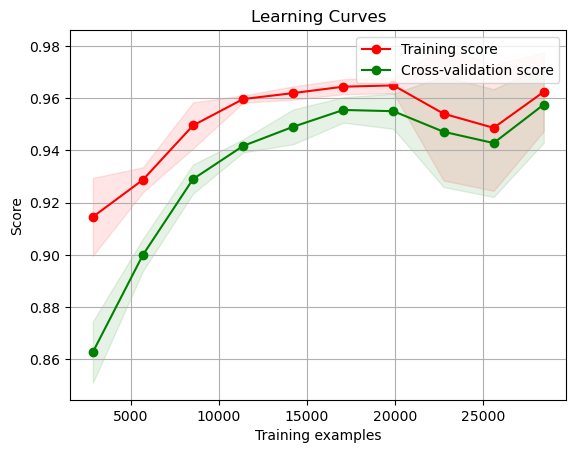

In [13]:

decision_tree = DecisionTree()

# Define the parameter grid
param_grid = {
    'max_depth': [3,5,7,10,12,13],
    'min_samples_leaf': [4,5,6,8,10],
    'min_information_gain': [0.005,0.01,0.05, 0.1],
    'criterion': ['entropy', 'gini']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(decision_tree, param_distributions=param_grid, n_iter=96, cv=5, scoring='accuracy', n_jobs=-1, random_state=48)

# Assuming X_train and y_train are defined
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-validation Accuracy: {best_score * 100:.2f}%')

# Use the best parameters to train the final model
best_dtc = random_search.best_estimator_
best_dtc.fit(X_train, y_train)

# Assuming X_test and y_test are defined
test_accuracy = best_dtc.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

train_accuracy = best_dtc.score(X_train, y_train)
test_accuracy = best_dtc.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
cv_results = random_search.cv_results_
print("Cross-Validation Mean Scores: ", cv_results['mean_test_score'])
print("Cross-Validation Std Dev: ", cv_results['std_test_score'])
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_dtc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create an instance of the custom decision tree
decision_tree = DecisionTree()

# Define a new parameter grid for further tuning
param_grid = {
    'max_depth': [7, 10, 12, 15],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_information_gain': [0.005, 0.01, 0.05],
    'criterion': ['entropy', 'gini']
}

# Initialize RandomizedSearchCV with n_iter=100
random_search = RandomizedSearchCV(decision_tree, param_distributions=param_grid, n_iter=92, cv=5, scoring='accuracy', n_jobs=-1, random_state=48)

# Assuming X_train and y_train are defined
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-validation Accuracy: {best_score * 100:.2f}%')

# Use the best parameters to train the final model
best_dtc = random_search.best_estimator_
best_dtc.fit(X_train, y_train)

# Assuming X_test and y_test are defined
test_accuracy = best_dtc.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

train_accuracy = best_dtc.score(X_train, y_train)
test_accuracy = best_dtc.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print Cross-Validation Results
cv_results = random_search.cv_results_
print("Cross-Validation Mean Scores: ", cv_results['mean_test_score'])
print("Cross-Validation Std Dev: ", cv_results['std_test_score'])

# Plot Learning Curves
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_dtc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()


Feature 2 importance updated by 0.026311602061590778 (total: 0.026311602061590778)
Feature 2 importance updated by 0.017340723277219583 (total: 0.017340723277219583)
Feature 56 importance updated by 0.01761403562258218 (total: 0.01761403562258218)
Feature 0 importance updated by 0.06017175144302789 (total: 0.06017175144302789)
Feature 2 importance updated by 0.0007648523016597977 (total: 0.01810557557887938)
Feature 2 importance updated by 0.10068100604626495 (total: 0.11878658162514433)
Feature 9 importance updated by 0.3514676688888165 (total: 0.3514676688888165)
Feature 61 importance updated by 0.026960293626960313 (total: 0.026960293626960313)
Feature 30 importance updated by 0.35681519357195024 (total: 0.35681519357195024)
Feature 64 importance updated by 0.08565148967189024 (total: 0.08565148967189024)
Feature 9 importance updated by 0.14232764429344813 (total: 0.4937953131822646)
Feature 2 importance updated by 0.023374726077428742 (total: 0.14216130770257307)
Feature 3 importan

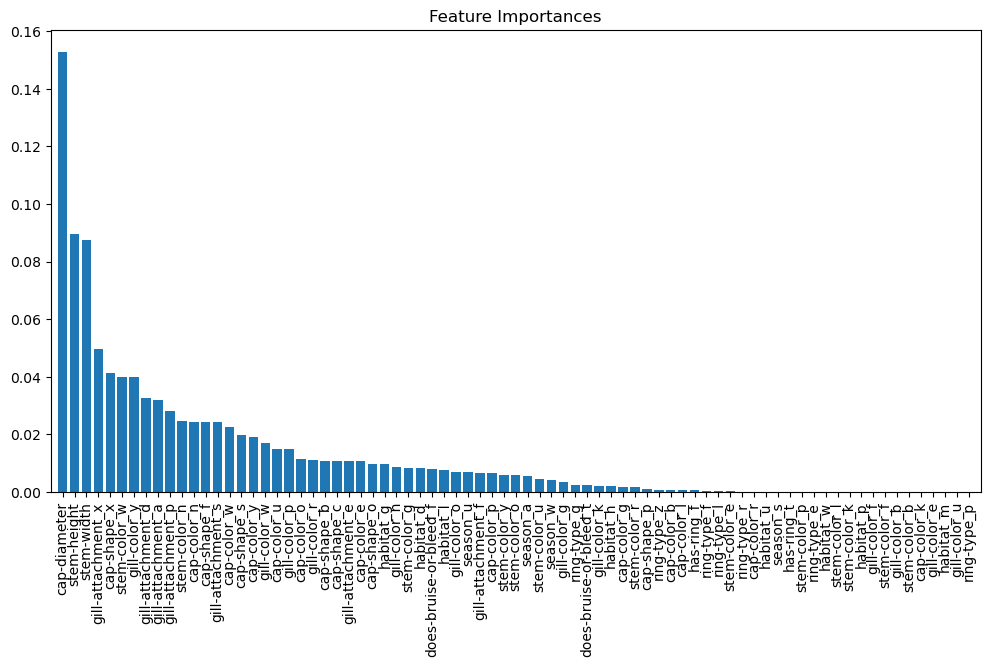

In [58]:
importances = best_dtc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [46]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42)
gbc.fit(X_train, y_train)
gbc_accuracy = gbc.score(X_test, y_test)
print(f'Gradient Boosting Test Accuracy: {gbc_accuracy * 100:.2f}%')

# AdaBoost Classifier
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_train, y_train)
abc_accuracy = abc.score(X_test, y_test)
print(f'AdaBoost Test Accuracy: {abc_accuracy * 100:.2f}%')

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)
rfc_accuracy = rfc.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {rfc_accuracy * 100:.2f}%')

Gradient Boosting Test Accuracy: 99.67%
AdaBoost Test Accuracy: 80.99%
Random Forest Test Accuracy: 96.81%
